In [7]:
#I have used the spotify API for developers
!pip install spotipy

In [8]:
#getting all the libraries required
import pandas as pd
import numpy as np
import json
import re
import sys
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

import warnings
warnings.filterwarnings("ignore")

In [9]:
%matplotlib inline

In [10]:
#reading the datasets the dataset

In [11]:
spotify_df = pd.read_csv("C:/Users/shrey/Desktop/Engage/data/data.csv")

In [12]:
spotify_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [13]:
data_w_genre = pd.read_csv("C:/Users/shrey/Desktop/Engage/data/data_w_genres.csv")
data_w_genre.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [14]:
data_w_genre.dtypes

genres               object
artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
dtype: object

In [15]:
#converting datatype of coulmn genres according to our requirement

In [16]:
data_w_genre['genres_upd'] = data_w_genre['genres'].apply(lambda x: [re.sub(' ','_',i) for i in re.findall(r"'([^']*)'", x)])

In [17]:
data_w_genre['genres_upd'].values[0][0]

'show_tunes'

In [18]:
spotify_df['artists_upd_v1'] = spotify_df['artists'].apply(lambda x: re.findall(r"'([^']*)'", x))

In [19]:
spotify_df['artists'].values[0]

"['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']"

In [20]:
spotify_df[spotify_df['artists_upd_v1'].apply(lambda x: not x)].head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists_upd_v1
143,0.300,1921,0.772,"[""Scarlet D'Carpio""]",0.560,249370,0.313,0,7b4eHImKQ51DYaQvNTdtEp,0.000005,6,0.115,-8.346,0,Himno Nacional del Perú,0,1921-09-23,0.0376,107.501,[]
234,0.902,1923,0.994,"[""King Oliver's Creole Jazz Band""]",0.708,194533,0.361,0,1xEEYhWxT4WhDQdxfPCT8D,0.883000,0,0.103,-11.764,0,Snake Rag,20,1923,0.0441,105.695,[]
238,0.554,1923,0.996,"[""King Oliver's Creole Jazz Band""]",0.546,170827,0.189,0,3rauXVLOOM5BlxWqUcDpkg,0.908000,0,0.339,-15.984,1,Chimes Blues,13,1923,0.0581,80.318,[]
244,0.319,1923,0.995,"[""Clarence Williams' Blue Five""]",0.520,197493,0.153,0,1UdqHVRFYMZKU2Q7xkLtYc,0.131000,0,0.353,-14.042,1,Pickin' On Your Baby,11,1923,0.0440,102.937,[]
249,0.753,1923,0.994,"[""King Oliver's Creole Jazz Band""]",0.359,187227,0.357,0,5SvyP1ZeJX1jA7AOZD08NA,0.819000,3,0.290,-11.810,1,Tears,10,1923,0.0511,205.053,[]


In [21]:
spotify_df['artists_upd_v2'] = spotify_df['artists'].apply(lambda x: re.findall('\"(.*?)\"',x))
spotify_df['artists_upd'] = np.where(spotify_df['artists_upd_v1'].apply(lambda x: not x), spotify_df['artists_upd_v2'], spotify_df['artists_upd_v1'] )

In [22]:
spotify_df['artists_song'] = spotify_df.apply(lambda row: str(row['artists_upd'][0])+str(row['name']),axis = 1)

In [23]:
spotify_df[spotify_df['name']=='Adore You']

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,mode,name,popularity,release_date,speechiness,tempo,artists_upd_v1,artists_upd_v2,artists_upd,artists_song
19425,0.569,2019,0.0237,['Harry Styles'],0.676,207133,0.771,0,3jjujdWJ72nww5eGnfs2E7,0.000007,...,1,Adore You,88,2019-12-13,0.0483,99.048,[Harry Styles],[],[Harry Styles],Harry StylesAdore You
38319,0.569,2019,0.0237,['Harry Styles'],0.676,207133,0.771,0,1M4qEo4HE3PRaCOM7EXNJq,0.000007,...,1,Adore You,77,2019-12-06,0.0483,99.048,[Harry Styles],[],[Harry Styles],Harry StylesAdore You


In [24]:
#dropping off duplicates

In [25]:
spotify_df.drop_duplicates('artists_song',inplace = True)

In [26]:
spotify_df[spotify_df['name']=='Adore You']

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,mode,name,popularity,release_date,speechiness,tempo,artists_upd_v1,artists_upd_v2,artists_upd,artists_song
19425,0.569,2019,0.0237,['Harry Styles'],0.676,207133,0.771,0,3jjujdWJ72nww5eGnfs2E7,0.000007,...,1,Adore You,88,2019-12-13,0.0483,99.048,[Harry Styles],[],[Harry Styles],Harry StylesAdore You


In [27]:
artists_exploded = spotify_df[['artists_upd','id']].explode('artists_upd')

In [28]:
#getting genres in usauble forms and then merging ṭhem

In [29]:
artists_exploded_enriched = artists_exploded.merge(data_w_genre, how = 'left', left_on = 'artists_upd',right_on = 'artists')

In [30]:
artists_exploded_enriched_nonnull = artists_exploded_enriched[~artists_exploded_enriched.genres_upd.isnull()]

In [31]:
artists_exploded_enriched_nonnull

,artists_upd,id,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres_upd
0,Sergei Rachmaninoff,4BJqT0PrAfrxzMOxytFOIz,"['classical', 'post-romantic era', 'russian ro...",Sergei Rachmaninoff,0.982384,0.340674,261014.582090,0.144225,0.793356,0.236443,-20.485082,0.041968,95.200198,0.264284,4.332090,2.0,1.0,268.0,"[classical, post-romantic_era, russian_romanti..."
1,James Levine,4BJqT0PrAfrxzMOxytFOIz,"['classical performance', 'opera', 'orchestral...",James Levine,0.944056,0.264578,328057.111111,0.166089,0.446163,0.232672,-19.491500,0.048306,102.657000,0.165772,25.833333,10.0,1.0,18.0,"[classical_performance, opera, orchestral_perf..."
2,Berliner Philharmoniker,4BJqT0PrAfrxzMOxytFOIz,"['classical', 'classical performance', 'german...",Berliner Philharmoniker,0.934082,0.245791,457913.194118,0.147937,0.746398,0.203505,-20.868388,0.044848,100.722912,0.164508,26.923529,2.0,1.0,170.0,"[classical, classical_performance, german_orch..."
3,Dennis Day,7xPhfUan2yNtyFG0cUWkt8,[],Dennis Day,0.840600,0.540000,171896.200000,0.370600,0.000002,0.259680,-11.580400,0.132540,95.256400,0.640600,3.000000,7.0,1.0,10.0,[]
4,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,1o6I8BglA6ylDMrIELygv1,[],KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.837952,0.368810,447737.142857,0.197665,0.498736,0.148443,-17.178000,0.053462,108.157619,0.101700,2.428571,9.0,1.0,42.0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206472,Ashnikko,0OStKKAuXlxA0fMH54Qs6E,['pop'],Ashnikko,0.108922,0.744692,164831.230769,0.639462,0.000000,0.190954,-5.923538,0.130662,118.878308,0.650077,70.384615,8.0,1.0,13.0,[pop]
206473,MAMAMOO,4BZXVFYCb76Q0Klojq4piV,"['k-pop', 'k-pop girl group']",MAMAMOO,0.124500,0.701600,195508.200000,0.826800,0.000008,0.191520,-3.204600,0.096180,108.902000,0.711600,73.400000,3.0,0.0,10.0,"[k-pop, k-pop_girl_group]"
206474,Eminem,5SiZJoLXp3WOl3J4C8IK0d,"['detroit hip hop', 'hip hop', 'rap']",Eminem,0.143151,0.730357,266668.690574,0.742206,0.007473,0.237455,-5.042256,0.271989,115.337803,0.551962,55.750000,1.0,0.0,488.0,"[detroit_hip_hop, hip_hop, rap]"
206475,KEVVO,7HmnJHfs0BkFzX4x8j0hkl,"['perreo', 'reggaeton', 'reggaeton flow', 'tra...",KEVVO,0.226667,0.842333,314535.333333,0.748000,0.001576,0.271000,-5.149333,0.111133,121.001667,0.771333,76.000000,7.0,0.0,3.0,"[perreo, reggaeton, reggaeton_flow, trap_latino]"


In [32]:
artists_exploded_enriched_nonnull[artists_exploded_enriched_nonnull['id'] =='3jjujdWJ72nww5eGnfs2E7']

,artists_upd,id,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres_upd
23337,Harry Styles,3jjujdWJ72nww5eGnfs2E7,"['pop', 'post-teen pop']",Harry Styles,0.268816,0.541462,238180.230769,0.586769,0.016809,0.156208,-6.386923,0.035888,114.687,0.406896,78.346154,5.0,1.0,52.0,"[pop, post-teen_pop]"


In [33]:
artists_genres_consolidated = artists_exploded_enriched_nonnull.groupby('id')['genres_upd'].apply(list).reset_index()

In [34]:
#getting genres in a list along with corresponding songs
artists_genres_consolidated['consolidates_genre_lists'] = artists_genres_consolidated['genres_upd'].apply(lambda x: list(set(list(itertools.chain.from_iterable(x)))))
artists_genres_consolidated.head()

,id,genres_upd,consolidates_genre_lists
0,000G1xMMuwxNHmwVsBdtj1,"[[candy_pop, dance_rock, new_wave, new_wave_po...","[power_pop, permanent_wave, rock, candy_pop, n..."
1,000GyYHG4uWmlXieKLij8u,"[[alternative_hip_hop, conscious_hip_hop, minn...","[pop_rap, minnesota_hip_hop, alternative_hip_h..."
2,000Npgk5e2SgwGaIsN3ztv,"[[classic_bollywood, classic_pakistani_pop, fi...","[classic_bollywood, sufi, filmi, ghazal, class..."
3,000ZxLGm7jDlWCHtcXSeBe,"[[boogie-woogie, piano_blues, ragtime, stride]]","[piano_blues, boogie-woogie, ragtime, stride]"
4,000jBcNljWTnyjB4YO7ojf,[[]],[]


In [35]:
#merging to get a single dataset
spotify_df = spotify_df.merge(artists_genres_consolidated[['id','consolidates_genre_lists']], on = 'id',how = 'left')

In [36]:
spotify_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,name,popularity,release_date,speechiness,tempo,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,consolidates_genre_lists
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.21100,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,"[Sergei Rachmaninoff, James Levine, Berliner P...",[],"[Sergei Rachmaninoff, James Levine, Berliner P...",Sergei RachmaninoffPiano Concerto No. 3 in D M...,"[ukrainian_classical, orchestral_performance, ..."
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.34100,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,Clancy Lowered the Boom,5,1921,0.4150,60.936,[Dennis Day],[],[Dennis Day],Dennis DayClancy Lowered the Boom,[]
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.16600,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,Gati Bali,5,1921,0.0339,110.339,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,[],[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,[]
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.30900,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,Danny Boy,3,1921,0.0354,100.109,[Frank Parker],[],[Frank Parker],Frank ParkerDanny Boy,[]
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.19300,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,[Phil Regan],[],[Phil Regan],Phil ReganWhen Irish Eyes Are Smiling,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156602,0.0838,2020,0.97400,['Najma Wallin'],0.175,133500,0.00759,0,6RuFOroO9VO0aMGEzirLHk,0.925000,...,Med slutna ögon,70,2020-02-21,0.0454,70.872,[Najma Wallin],[],[Najma Wallin],Najma WallinMed slutna ögon,[]
156603,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.75300,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,...,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,[Ashnikko],[],[Ashnikko],AshnikkoHalloweenie III: Seven Days,[pop]
156604,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.85800,0,4BZXVFYCb76Q0Klojq4piV,0.000009,...,AYA,76,2020-11-03,0.0809,91.688,[MAMAMOO],[],[MAMAMOO],MAMAMOOAYA,"[k-pop_girl_group, k-pop]"
156605,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.62300,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,...,Darkness,70,2020-01-17,0.3080,75.055,[Eminem],[],[Eminem],EminemDarkness,"[detroit_hip_hop, hip_hop, rap]"


In [37]:
#converting values in ohe variables: popularity and year 

In [38]:
spotify_df['year'] = spotify_df['release_date'].apply(lambda x: x.split('-')[0])

In [39]:
float_cols = spotify_df.dtypes[spotify_df.dtypes == 'float64'].index.values

In [40]:
ohe_cols = 'popularity'

In [41]:
spotify_df['popularity'].describe()

count    156607.000000
mean         31.548890
std          21.936866
min           0.000000
25%          11.000000
50%          34.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [42]:
spotify_df['popularity_red'] = spotify_df['popularity'].apply(lambda x: int(x/5))

In [43]:
spotify_df['consolidates_genre_lists'] = spotify_df['consolidates_genre_lists'].apply(lambda m: m if isinstance(m,list) else[])

In [44]:
spotify_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,popularity,release_date,speechiness,tempo,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,consolidates_genre_lists,popularity_red
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,4,1921,0.0366,80.954,"[Sergei Rachmaninoff, James Levine, Berliner P...",[],"[Sergei Rachmaninoff, James Levine, Berliner P...",Sergei RachmaninoffPiano Concerto No. 3 in D M...,"[ukrainian_classical, orchestral_performance, ...",0
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,5,1921,0.4150,60.936,[Dennis Day],[],[Dennis Day],Dennis DayClancy Lowered the Boom,[],1
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,5,1921,0.0339,110.339,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,[],[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,[],1
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,3,1921,0.0354,100.109,[Frank Parker],[],[Frank Parker],Frank ParkerDanny Boy,[],0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,2,1921,0.0380,101.665,[Phil Regan],[],[Phil Regan],Phil ReganWhen Irish Eyes Are Smiling,[],0


In [45]:
def ohe_cre(df, column, new):
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)
    return tf_df

In [46]:
#Using TFIDF to generate vectors to use for recommendations
def feature_set(df, float_cols):
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df['consolidates_genre_lists'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
    genre_df.reset_index(drop = True, inplace=True)
    
    year_ohe = ohe_cre(df, 'year', 'year') * 0.5
    popularity_ohe = ohe_cre(df,'popularity_red','pop') * 0.15
    
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2
    
    final = pd.concat([genre_df, floats_scaled, popularity_ohe, year_ohe], axis = 1)
    
    final['id'] = df['id'].values
    
    return final

In [47]:
#This feature set has values in form of numbers which will be used to genrate recommendations
complete_feature_set = feature_set(spotify_df, float_cols = float_cols)

In [48]:
complete_feature_set.head()

,genre|21st_century_classical,genre|432hz,genre|_hip_hop,genre|a_cappella,genre|abstract,genre|abstract_beats,genre|abstract_hip_hop,genre|accordeon,genre|accordion,genre|acid_house,...,year|2012,year|2013,year|2014,year|2015,year|2016,year|2017,year|2018,year|2019,year|2020,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4BJqT0PrAfrxzMOxytFOIz
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7xPhfUan2yNtyFG0cUWkt8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1o6I8BglA6ylDMrIELygv1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3ftBPsC5vPBKxYSee08FDH
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4d6HGyGT8e121BsdKmw9v6


In [49]:
#Connecting to spotify api to get playlists

In [50]:
client_id = '403fa2a972534d239b5cb78b46a2662d'
client_secret = '6bb32251ab114b04b74fdee713fe1944'

In [51]:
scope = 'user-library-read'

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()

In [52]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret = client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [53]:
token = util.prompt_for_user_token(scope, client_id = client_id, client_secret=client_secret, redirect_uri='http://localhost:8881/') 

In [54]:
sp = spotipy.Spotify(auth=token)

In [55]:
#getting playlists to use them as input to get similiar playlists
id_name = {}
list_photo = {}
for i in sp.current_user_playlists()['items']:

    id_name[i['name']] = i['uri'].split(':')[2]
    #list_photo[i['uri'].split(':')[2]] = i['images'][0]['url']

In [56]:
id_name

{'Already home': '4kber9TmLr7PsJJiU9XY8l',
 'You': '46P87QqpkXxTllJrwwZQGI',
 'Sleep': '4Oc6QFBmxFILm7GLzpUgqU',
 'My Playlist #21': '4p4R9Hn0hpKjWfUkOVmdWL',
 'Guru': '0NimndbfC3MeZD9oiEwuDc',
 'Tay': '2eNea59ccgmJcmHc6YcTn1',
 'INDIE SHREYA': '0V0YwaFpeDd7joP7ff4ROu',
 'Where did the love go??': '255eiqPoGFmBg2z7Utj73B',
 'YES!': '2Qfga8TODlEOGCJ75dUdJt',
 'I will scream out loud': '57HFlHKUo0Dt1cVFVgJyGu',
 'My Playlist #13': '7iVJWFa8cf9uCUac1sAXZL',
 'Am I falling in love??': '3pZgRMzwICQyKWvn7alXKw',
 'Happy😊': '0jNvtLPjs55h1jOj3u715M',
 'One Dee': '4EOwpT3SbC1OW2MEQIwv7z',
 'Bopsss': '2FFCD5KKLjSEZqDX3uNn8n',
 'Soft chill': '2xtlWiRV67E3X3vcfyhspf',
 'Bath': '5xutJ5LRC8Ns8p5bdlhR5f',
 'BTS FAVS🤍': '21sbebqSegr1N4kWHI9uOT',
 'Favss': '5NSPwV5cb8pH5Jz3AL79KZ',
 'Juice': '6VavgqgRf2r8KEWUzBlxJa',
 'Hk': '2drjnq0gJG7vF8BVpiWhXJ',
 'Clouds': '2YgSKn4PMcS3A7CZmiQFkA',
 'My': '2SCsbrQBJeX5XuISUkL1WD'}

In [57]:
#a function which will take in names of playlists and use them to get name of all the songs in there
def get_songs(playlist_name,id_dic,df):
    playlist = pd.DataFrame()
    playlist_name = playlist_name
    
    for ix, i in enumerate(sp.playlist(id_dic[playlist_name])['tracks']['items']):
        #print(i['track']['artists'][0]['name'])
        playlist.loc[ix, 'artist'] = i['track']['artists'][0]['name']
        playlist.loc[ix, 'name'] = i['track']['name']
        playlist.loc[ix, 'id'] = i['track']['id'] # ['uri'].split(':')[2]
        playlist.loc[ix, 'url'] = i['track']['album']['images'][1]['url']
        playlist.loc[ix, 'date_added'] = i['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['id'].isin(df['id'].values)].sort_values('date_added',ascending = False)
    
    return playlist

In [58]:
#getting songs of one playlist
playlist_name = get_songs('YES!',id_name,spotify_df)

In [59]:
playlist_name

,artist,name,id,url,date_added
42,One Direction,Night Changes,5O2P9iiztwhomNh8xkR9lJ,https://i.scdn.co/image/ab67616d00001e02d304ba...,2022-03-02 17:15:45+00:00
38,The 1975,Be My Mistake,18UsAG7SfOQ5sxJEdjAMH0,https://i.scdn.co/image/ab67616d00001e026c5820...,2022-01-30 20:53:18+00:00
37,Bruno Major,Nothing,2IAR0DziHCjSu16gR4ihvy,https://i.scdn.co/image/ab67616d00001e0295998c...,2022-01-22 10:41:58+00:00
36,Taylor Swift,Call It What You Want,1GwMQaZz6Au3QLDbjbMdme,https://i.scdn.co/image/ab67616d00001e02da5d5a...,2022-01-12 16:47:11+00:00
35,Jake Scott,Favorite T-Shirt - Acoustic,2PR4jVXzyjCky2PkONvipq,https://i.scdn.co/image/ab67616d00001e0263a24c...,2022-01-08 15:58:20+00:00
34,Lauv,Paris in the Rain,41CgzGD7xlgnJe14R4cqkL,https://i.scdn.co/image/ab67616d00001e02535591...,2022-01-06 16:47:54+00:00
30,John Legend,All of Me,3U4isOIWM3VvDubwSI3y7a,https://i.scdn.co/image/ab67616d00001e0294c921...,2021-12-06 07:29:33+00:00
29,Troye Sivan,Strawberries & Cigarettes,3afkJSKX0EAMsJXTZnDXXJ,https://i.scdn.co/image/ab67616d00001e02c9eb4c...,2021-12-01 05:13:18+00:00
28,James Arthur,Rewrite The Stars (with James Arthur & Anne-Ma...,6mQLN3zRtAp6ovjusyYKrV,https://i.scdn.co/image/ab67616d00001e02fdcd66...,2021-11-22 10:06:15+00:00
27,Ariana Grande,pov,3UoULw70kMsiVXxW0L3A33,https://i.scdn.co/image/ab67616d00001e025ef878...,2021-11-18 05:14:26+00:00


In [60]:
from skimage import io
import matplotlib.pyplot as plt
#takes in the songs of a dataframes and diaplays songs' cover images
def visualize_songs(df):
    
    temp = df['url'].values
    plt.figure(figsize=(15,int(0.625* len(temp))))
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(df['name'].values[i], fontsize = 12)
        plt.tight_layout(h_pad=0.4, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

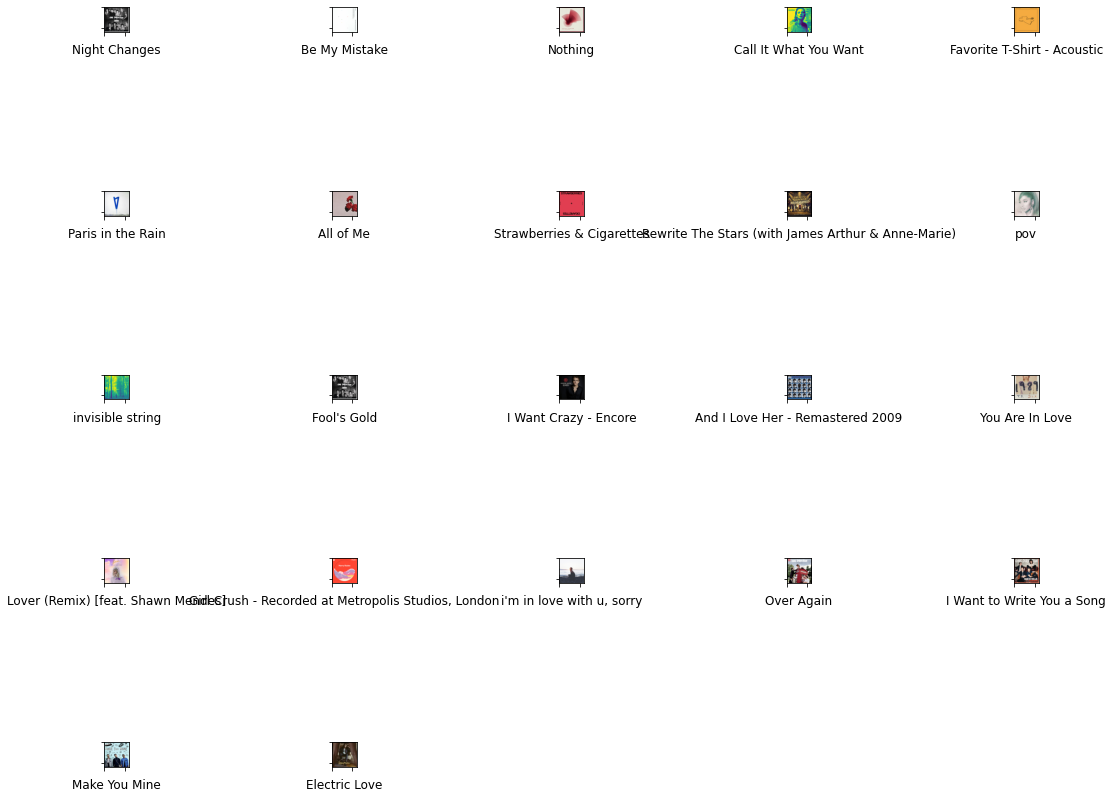

In [61]:
visualize_songs(playlist_name)

In [62]:
#creates a playlist vector from its feature set
def generate_playlist_feature(complete_feature_set, playlist_df, weight_factor):
    
    complete_feature_set_playlist = complete_feature_set[complete_feature_set['id'].isin(playlist_df['id'].values)]#.drop('id', axis = 1).mean(axis =0)
    complete_feature_set_playlist = complete_feature_set_playlist.merge(playlist_df[['id','date_added']], on = 'id', how = 'inner')
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['id'].isin(playlist_df['id'].values)]#.drop('id', axis = 1)
    
    playlist_feature_set = complete_feature_set_playlist.sort_values('date_added', ascending = False)
    
    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'months_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days / 30)
        
    playlist_feature_set['weight'] = playlist_feature_set['months_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-4].mul(playlist_feature_set_weighted.weight,0))
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:,:-4]
    
    return playlist_feature_set_weighted_final.sum(axis = 0), complete_feature_set_nonplaylist


In [63]:
complete_feature_set_playlist_vector_name, complete_feature_set_nonplaylist_name = generate_playlist_feature(complete_feature_set, playlist_name, 1.09)

In [64]:
complete_feature_set_playlist_vector_name.shape

(3068,)

In [65]:
#using sine cosine similarity it generates a playlist of recommended songs
def generate_playlist_recomm(df, features, nonplaylist_features):
    
    non_playlist_df = df[df['id'].isin(nonplaylist_features['id'].values)]
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_10 = non_playlist_df.sort_values('sim',ascending = False).head(10)
    non_playlist_df_top_10['url'] = non_playlist_df_top_10['id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return non_playlist_df_top_10

In [69]:
Final_top10 = generate_playlist_recomm(spotify_df, complete_feature_set_playlist_vector_name, complete_feature_set_nonplaylist_name)

In [67]:
Final_top10

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,speechiness,tempo,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,consolidates_genre_lists,popularity_red,sim,url
35863,0.902,2018,0.465,['Bazzi'],0.745,167553,0.561,0,5YLHLxoZsodDWjqSgjhBf3,0.000001,...,0.0720,195.918,[Bazzi],[],[Bazzi],BazziMyself,"[pop, post-teen_pop]",15,0.817789,https://i.scdn.co/image/ab67616d00001e02f9f2d4...
35778,0.539,2018,0.385,['Bazzi'],0.651,167019,0.654,1,6pmZMP2ET1OJi5rKfLO8jD,0.000000,...,0.0466,141.975,[Bazzi],[],[Bazzi],Bazzi3:15,"[pop, post-teen_pop]",14,0.816276,https://i.scdn.co/image/ab67616d00001e02f9f2d4...
114823,0.417,2018,0.820,['Lauv'],0.681,179998,0.340,0,1Fo4OvzP9PThFKMeMIAEYu,0.000000,...,0.0339,129.980,[Lauv],[],[Lauv],LauvSuperhero,"[pop, post-teen_pop]",13,0.814519,https://i.scdn.co/image/ab67616d00001e0234a512...
100481,0.605,2018,0.583,['Bazzi'],0.663,147021,0.666,0,6fZpcVRr45Z6fLtciswBBU,0.000004,...,0.1250,159.983,[Bazzi],[],[Bazzi],BazziDreams,"[pop, post-teen_pop]",12,0.814430,https://i.scdn.co/image/ab67616d00001e02f9f2d4...
35787,0.540,2018,0.353,['Bazzi'],0.676,148260,0.670,1,7lozLnUfzcgEpMMVQI7yhA,0.000000,...,0.0374,113.010,[Bazzi],[],[Bazzi],BazziWhy,"[pop, post-teen_pop]",14,0.813835,https://i.scdn.co/image/ab67616d00001e02f9f2d4...
85513,0.528,2018,0.657,['Ariana Grande'],0.604,322027,0.449,1,7u6DMPznGbpziuEgCE0JGQ,0.000000,...,0.0353,100.355,[Ariana Grande],[],[Ariana Grande],Ariana Grandeget well soon,"[pop, post-teen_pop]",13,0.812654,https://i.scdn.co/image/ab67616d00001e02c3af0c...
53319,0.658,2018,0.186,['Ariana Grande'],0.710,172107,0.614,1,0WdR2AyLW1Drd3OUdwezM0,0.000000,...,0.0431,148.152,[Ariana Grande],[],[Ariana Grande],Ariana Grandeeverytime,"[pop, post-teen_pop]",14,0.812632,https://i.scdn.co/image/ab67616d00001e02c3af0c...
53337,0.622,2018,0.375,['Ariana Grande'],0.831,245667,0.485,1,1xWH8zYtDeS9mW1JJG23VZ,0.000015,...,0.1500,80.022,[Ariana Grande],[],[Ariana Grande],Ariana GrandeR.E.M,"[pop, post-teen_pop]",13,0.811045,https://i.scdn.co/image/ab67616d00001e02c3af0c...
69710,0.735,2018,0.107,['Ariana Grande'],0.847,227387,0.603,1,5YeHLHDdQ4nKHk81XFWhCU,0.000007,...,0.0397,114.045,[Ariana Grande],[],[Ariana Grande],Ariana Grandesuccessful,"[pop, post-teen_pop]",13,0.809957,https://i.scdn.co/image/ab67616d00001e02c3af0c...
85434,0.429,2018,0.942,['Ariana Grande'],0.336,37640,0.231,1,0v2LUO8oTHnkjQ8MmKuXyk,0.000000,...,0.0497,168.685,[Ariana Grande],[],[Ariana Grande],Ariana Granderaindrops (an angel cried),"[pop, post-teen_pop]",13,0.809603,https://i.scdn.co/image/ab67616d00001e02c3af0c...


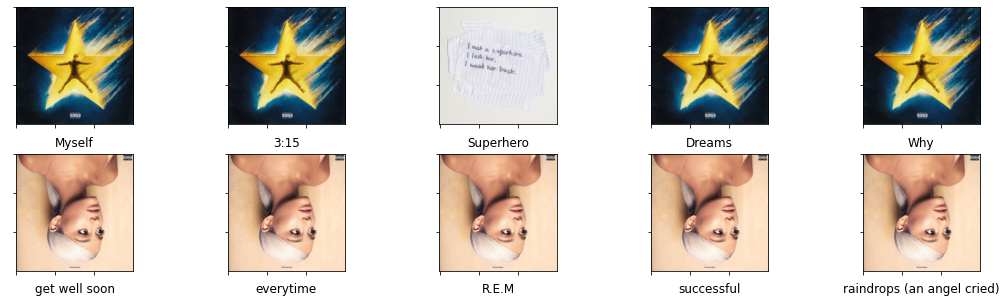

In [68]:
#generated playlist one would like
visualize_songs(Final_top10)